### Introduction:
The Mutual Funds India project aims to analyze and predict mutual fund performance in the Indian market using machine learning techniques. The objective is to provide investors with valuable insights and predictions to make informed investment decisions and maximize returns.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [44]:
df = pd.read_csv('mutual_fund.csv')
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


#### Exploratory Data Analysis

In [45]:
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,793.000000,647.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,4.400491,2.641278,3.921376,18.525347,9.490726
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.814741,1.463476,6.675502,12.108476,3.714015
min,0.000000,0.000000,0.000000,2.380000,1.000000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,3.000000,2.000000,1.500000,6.200000,6.700000
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,6.000000,3.000000,4.400000,18.500000,8.900000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,6.000000,4.000000,5.600000,27.100000,12.200000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,6.000000,5.000000,130.800000,71.400000,23.200000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [47]:
df.shape

(814, 20)

In [48]:
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [49]:
# Replace '-' with NaN to mark missing values
df.replace('-', np.nan, inplace=True)

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

C:\Users\uqba2\AppData\Local\Temp\ipykernel_13532\3794968901.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [69]:
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino           23
alpha             42
sd                24
beta              42
sharpe            23
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr        0
returns_5yr        0
overall_return     0
return_group       0
dtype: int64

In [70]:
objectcols = ['sortino', 'alpha', 'sd','beta', 'sharpe']
df[objectcols] = df[objectcols].astype(float)
df[objectcols].mean(axis = 0, skipna = True)

sortino     2.652642
alpha       2.505635
sd         10.272696
beta        0.822241
sharpe      1.204185
dtype: float64

In [71]:
df[objectcols] = df[objectcols].fillna(df[objectcols].mean(axis = 0, skipna = True))

In [72]:
df.isnull().sum()

scheme_name       0
min_sip           0
min_lumpsum       0
expense_ratio     0
fund_size_cr      0
fund_age_yr       0
fund_manager      0
sortino           0
alpha             0
sd                0
beta              0
sharpe            0
risk_level        0
amc_name          0
rating            0
category          0
sub_category      0
returns_1yr       0
returns_3yr       0
returns_5yr       0
overall_return    0
return_group      0
dtype: int64

* Average Expense Ratio

In [50]:
average_expense_ratio = df['expense_ratio'].mean()
print("Average Expense Ratio:", average_expense_ratio)

Average Expense Ratio: 0.7132309582309582


* Distribution fund categories

In [51]:
fund_categories = df['category'].unique()
num_categories = len(fund_categories)

# Print the result
print("Number of different fund categories:", num_categories)

Number of different fund categories: 5


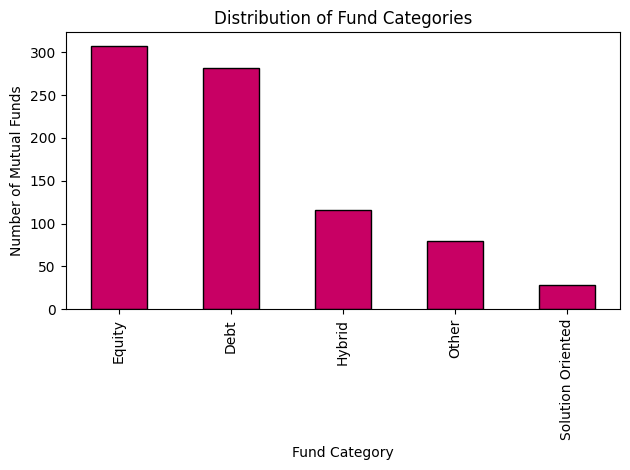

In [52]:
fund_category_counts = df['category'].value_counts()

# Create a bar plot to visualize the distribution of fund categories

plt.bar(fund_category_counts.index, fund_category_counts.values, color = "#c80064", width = 0.5, edgecolor='black')
plt.xlabel('Fund Category')
plt.ylabel('Number of Mutual Funds')
plt.title('Distribution of Fund Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


* Fund Performance at Category Level

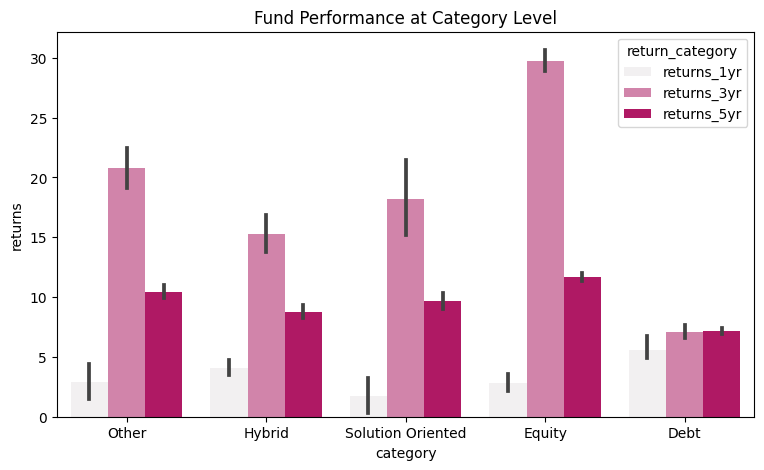

In [53]:
# Melt the DataFrame to reshape the returns columns
df_melted = df.melt(id_vars=['scheme_name', 'category', 'sub_category'],
                    value_vars=['returns_1yr', 'returns_3yr', 'returns_5yr'],
                    var_name='return_category', value_name='returns')

# Plot the fund performance at the category level using seaborn
plt.figure(figsize=(9, 5))
sns.barplot(data=df_melted, x='category', y='returns', hue='return_category', estimator=np.mean, color ="#c80064")
plt.title('Fund Performance at Category Level')
plt.show()

* Funds with High Risk Level

In [54]:
df_sorted = df.sort_values(by='risk_level', ascending=False)

# Extract the top 10 mutual funds with the highest risk level
top_10_high_risk_funds = df_sorted.head(10)

# Select the 'scheme_name' column from the result
top_10_high_risk_fund_names = top_10_high_risk_funds['scheme_name']

# Print the result
print("Top 10 Mutual Funds with High Risk Level:")
print(top_10_high_risk_fund_names)

Top 10 Mutual Funds with High Risk Level:
526                  Motilal Oswal Nifty Bank Index Fund
751                           Taurus Nifty 50 Index Fund
301                    ICICI Pru Bharat Consumption Fund
300             ICICI Pru BHARAT 22 FOF  – Direct Growth
748                                Taurus Flexi Cap Fund
298    ICICI Pru Banking & Financial Services – Direc...
470                                LIC MF Flexi Cap Fund
573                   Nippon India Tax Saver (ELSS) Fund
294                                      HSBC Value Fund
749                           Taurus Infrastructure Fund
Name: scheme_name, dtype: object


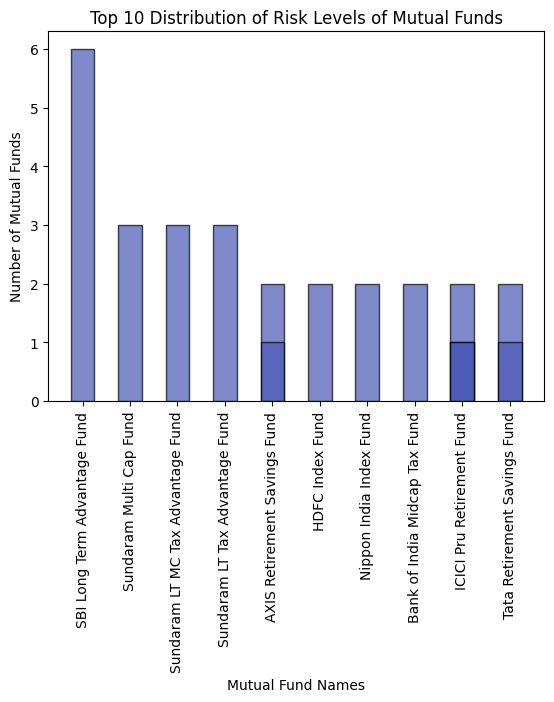

In [55]:
# Group the data by 'scheme_name' and 'risk_level', and then calculate the count of mutual funds in each risk level
risk_level_counts = df.groupby(['scheme_name', 'risk_level']).size().reset_index(name='count')
risk_sorted = risk_level_counts.sort_values(by='count', ascending=False)

top_10_names = risk_sorted['scheme_name'].head(10)
top_10_data = risk_sorted[risk_sorted['scheme_name'].isin(top_10_names)]

# Create a bar plot to visualize the distribution of risk levels of the top 10 mutual funds with their names
plt.bar(top_10_data['scheme_name'], top_10_data['count'], color='#4958B5',edgecolor='black', width=0.5,alpha=0.7)
plt.xlabel('Mutual Fund Names')
plt.ylabel('Number of Mutual Funds')
plt.title('Top 10 Distribution of Risk Levels of Mutual Funds')
plt.xticks(rotation=90)
plt.show()

* Top Performing Mutual Funds (1-Year Returns)

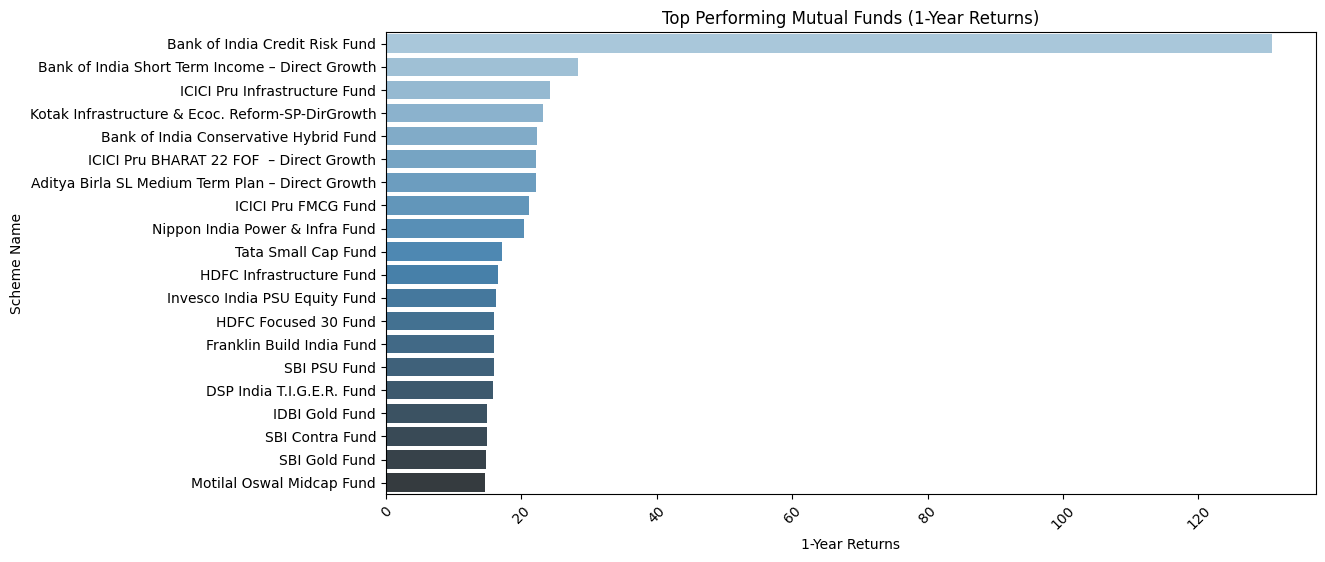

In [56]:
# Filter for mutual funds that consistently outperformed the market
outperforming_funds = df[df['returns_1yr'] > df['returns_1yr'].mean()]
sorted_funds = outperforming_funds.sort_values('returns_1yr', ascending=False)

# Select top 10 performing funds
top_performing_funds = sorted_funds.head(20)

# Create a bar chart to visualize the performance of top performing funds
plt.figure(figsize=(12, 6))
sns.barplot(data=top_performing_funds, x='returns_1yr', y='scheme_name',palette='Blues_d')
plt.xlabel('1-Year Returns')
plt.ylabel('Scheme Name')
plt.title('Top Performing Mutual Funds (1-Year Returns)')
plt.xticks(rotation=45)

# Display the plot
plt.show()

* Top Performing Mutual Funds (3-Year Returns)

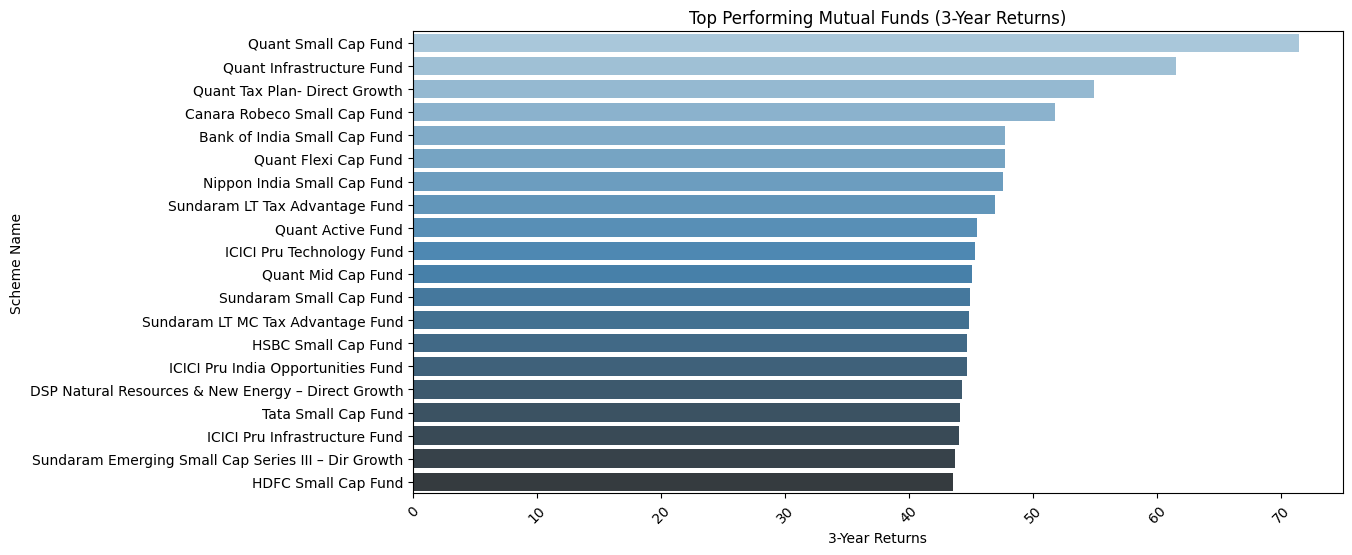

In [57]:
# Filter for mutual funds that consistently outperformed the market
outperforming_funds = df[df['returns_3yr'] > df['returns_3yr'].mean()]
sorted_funds = outperforming_funds.sort_values('returns_3yr', ascending=False)

# Select top 10 performing funds
top_performing_funds = sorted_funds.head(20)

# Create a bar chart to visualize the performance of top performing funds
plt.figure(figsize=(12, 6))
sns.barplot(data=top_performing_funds, x='returns_3yr', y='scheme_name',palette='Blues_d')
plt.xlabel('3-Year Returns')
plt.ylabel('Scheme Name')
plt.title('Top Performing Mutual Funds (3-Year Returns)')
plt.xticks(rotation=45)

# Display the plot
plt.show()

* Top Performing Mutual Funds (5-Year Returns)

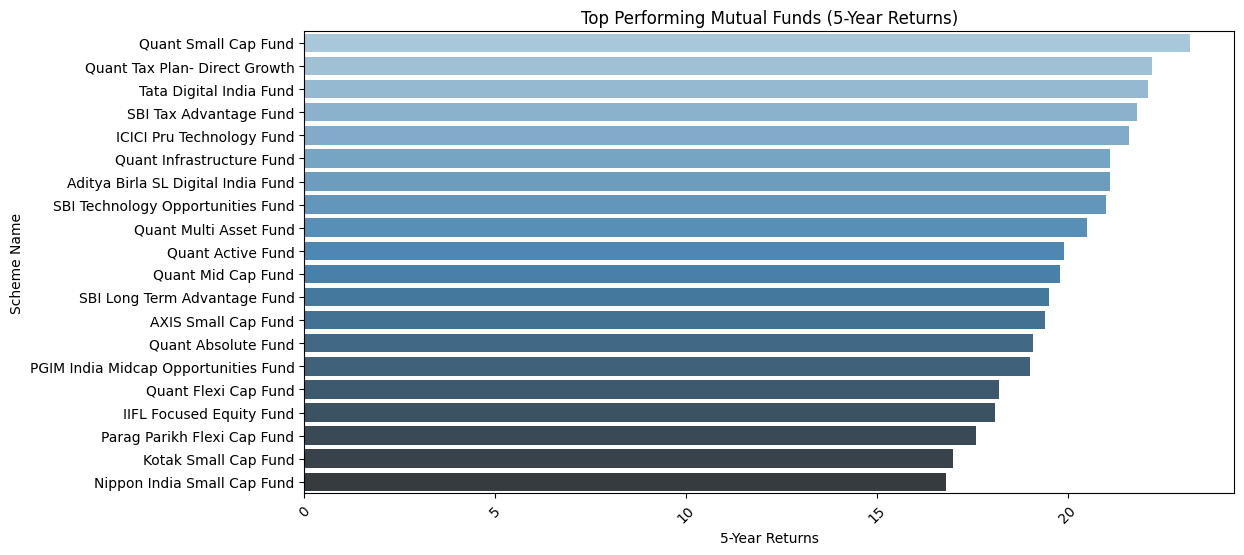

In [58]:
outperforming_funds = df[df['returns_5yr'] > df['returns_5yr'].mean()]
sorted_funds = outperforming_funds.sort_values('returns_5yr', ascending=False)

# Select top 10 performing funds
top_performing_funds = sorted_funds.head(20)

# Create a bar chart to visualize the performance of top performing funds
plt.figure(figsize=(12, 6))
sns.barplot(data=top_performing_funds, x='returns_5yr', y='scheme_name',palette='Blues_d')
plt.xlabel('5-Year Returns')
plt.ylabel('Scheme Name')
plt.title('Top Performing Mutual Funds (5-Year Returns)')
plt.xticks(rotation=45)

# Display the plot
plt.show()

* Consistently Outperforming Mutual Funds

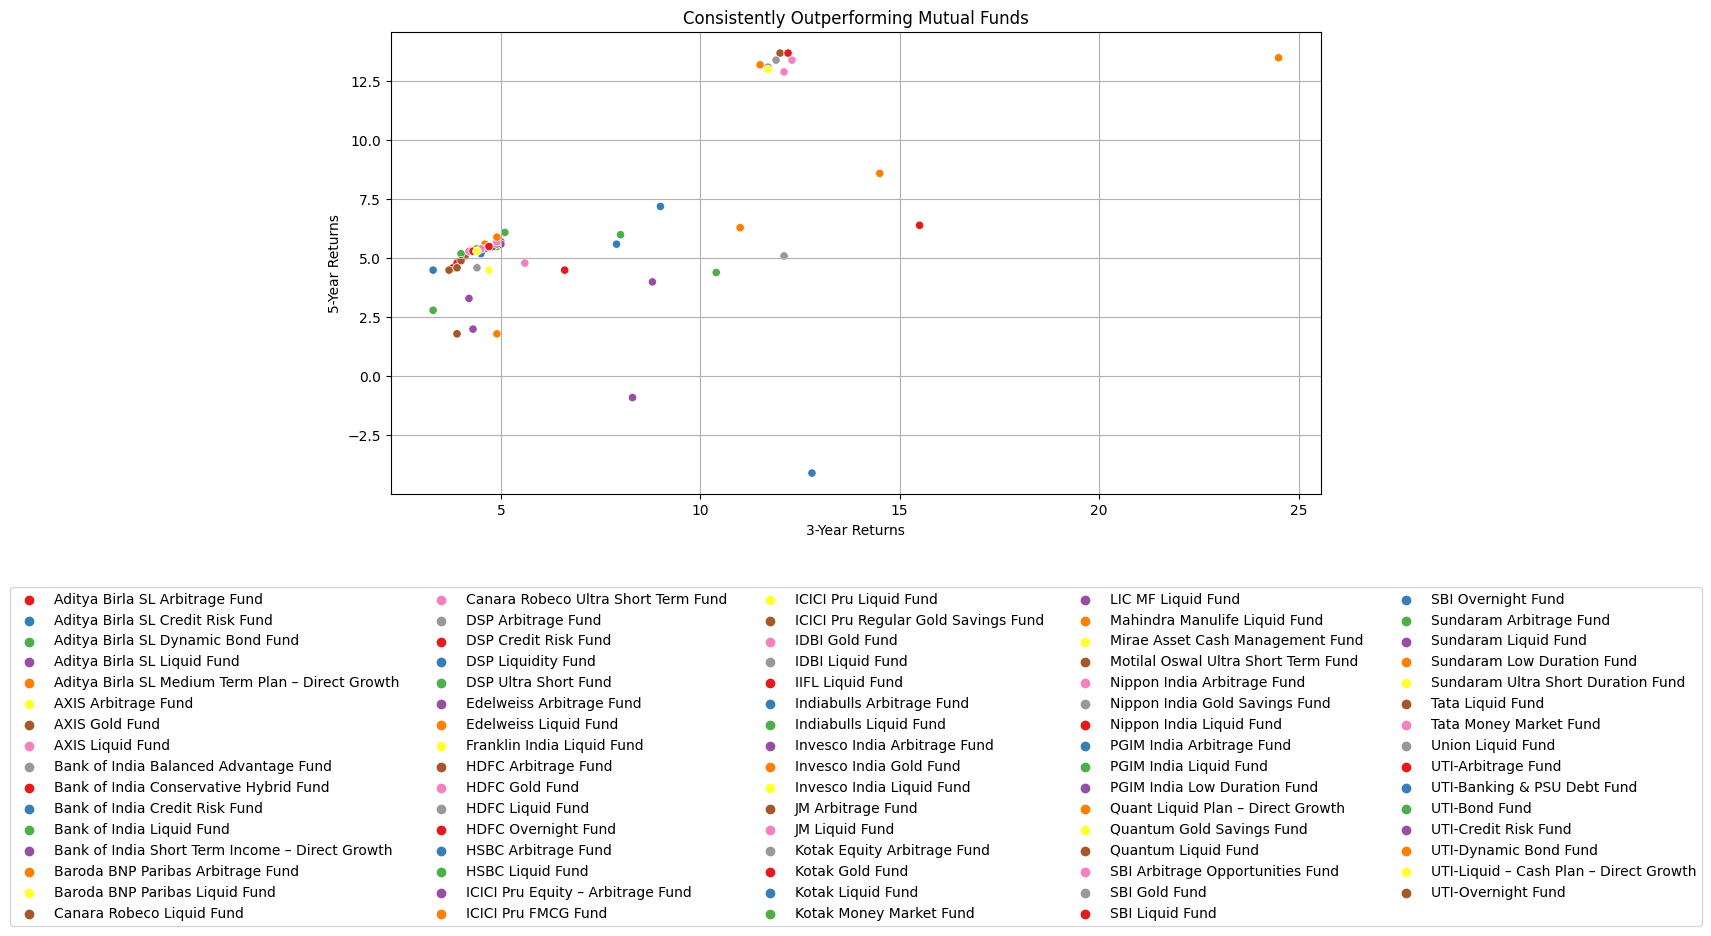

In [59]:
columns = ['scheme_name', 'returns_1yr', 'returns_3yr', 'returns_5yr']

# Calculate the average returns for all funds
average_returns = df[columns[1:]].mean(axis=1)

# Filter for mutual funds that consistently outperformed the market
consistently_outperformed = df[df[columns[1]] > average_returns]

# Plot the performance metrics of consistently outperforming mutual funds
plt.figure(figsize=(12, 6))
sns.scatterplot(data=consistently_outperformed, x=columns[2], y=columns[3], hue=columns[0], palette='Set1')
plt.xlabel('3-Year Returns')
plt.ylabel('5-Year Returns')
plt.title('Consistently Outperforming Mutual Funds')
plt.legend(ncol=5,bbox_to_anchor =(0.5,-0.95), loc='lower center')
plt.grid(True)

# Display the plot
plt.show()

In [60]:
# Calculate the overall_return by taking the mean of 'returns_1yr', 'returns_3yr', and 'returns_5yr'
df['overall_return'] = df[['returns_1yr', 'returns_3yr', 'returns_5yr']].mean(axis=1).round(1)

# Use numpy's select function to create 'return_group' based on conditions
conditions = [
    (df['overall_return'] <= 10),
    (df['overall_return'] <= 20),
    (df['overall_return'] > 20)
]
choices = ['Less than 10%', '10% to 20%', 'Higher than 20%']
df['return_group'] = np.select(conditions, choices)

# Display the selected columns
print(df[['overall_return', 'return_group']].head())


   overall_return   return_group
0             5.8  Less than 10%
1             5.3  Less than 10%
2            10.2     10% to 20%
3             8.6  Less than 10%
4            10.9     10% to 20%


* Top performing Funds based on Average Returns¶

In [61]:
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

# Create the interactive function
@interact
def recomd_funds(return_group=list(df['return_group'].unique()), Top=list([10, 20, 30, 40, 50, 100, 500])):
    a = df.query('return_group == @return_group')[['scheme_name', 'returns_1yr', 'returns_3yr', 'returns_5yr', 'overall_return']]
    a = a.sort_values(by='overall_return', ascending=False)
    n = a.scheme_name.count()
    print('{} funds found: \nTop {} funds giving returns {} listed below:'.format(n, Top, return_group))
    return a.set_index('scheme_name')[:Top]


interactive(children=(Dropdown(description='return_group', options=('Less than 10%', '10% to 20%', 'Higher tha…

* Top performing Funds based on Rating

In [62]:
@interact
def recomd_funds_rating(rating=list(df['rating'].sort_values(ascending=False).unique()), Top=list([10, 20, 30, 40, 50, 100, 500])):
    # Use the query method for filtering the data based on the selected rating
    a = df.query('rating == @rating')[['scheme_name', 'rating', 'returns_1yr', 'returns_3yr', 'returns_5yr', 'overall_return',
                                       'fund_size_cr', 'fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe']]
    
   
    a = a.sort_values(by='overall_return', ascending=False)
    n = a.scheme_name.count()
    
    print('{} funds found: \nTop {} funds with rating {} listed below:'.format(n, Top, rating))
    return a.set_index('scheme_name')[:Top]


interactive(children=(Dropdown(description='rating', options=(5, 4, 3, 2, 1, 0), value=5), Dropdown(descriptio…

In [63]:

# Create the interactive function
@interact
def recomd_funds_rating(Top=list([10, 20, 30, 40, 50])):
    # Sort data based on the sd value in descending order and use head() to get top funds
    a = df.sort_values(by='sd', ascending=False).head(Top)[['scheme_name', 'sd', 'overall_return', 'returns_1yr', 'returns_3yr', 'returns_5yr', 'rating',
                                                            'sortino', 'alpha', 'beta', 'sharpe']]
    
    # Print the result and return the top N funds
    print('Top {} funds having sd value sorted in descending order listed below:'.format(Top))
    return a.set_index('scheme_name')



interactive(children=(Dropdown(description='Top', options=(10, 20, 30, 40, 50), value=10), Output()), _dom_cla…

#### Start creating ML model

In [64]:
# library from preprocessing Module.
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


# library from model selection Module
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [65]:
# Splitting data into training and testing set
X = df[['returns_3yr', 'returns_5yr', 'expense_ratio', 'fund_size_cr', 'fund_age_yr', 'sharpe']]
y = df['returns_1yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train:',len(X_train))
print('X_test:',len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))

X_train: 651
X_test: 163
y_train 651
y_test 163


In [66]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   scheme_name     814 non-null    object 
 1   min_sip         814 non-null    int64  
 2   min_lumpsum     814 non-null    int64  
 3   expense_ratio   814 non-null    float64
 4   fund_size_cr    814 non-null    float64
 5   fund_age_yr     814 non-null    int64  
 6   fund_manager    814 non-null    object 
 7   sortino         791 non-null    object 
 8   alpha           772 non-null    object 
 9   sd              790 non-null    object 
 10  beta            772 non-null    object 
 11  sharpe          791 non-null    object 
 12  risk_level      814 non-null    int64  
 13  amc_name        814 non-null    object 
 14  rating          814 non-null    int64  
 15  category        814 non-null    object 
 16  sub_category    814 non-null    object 
 17  returns_1yr     814 non-null    flo

In [67]:
cols = ['expense_ratio','fund_size_cr','returns_1yr','returns_3yr',	'returns_5yr','overall_return']

ord = OrdinalEncoder()
ord.fit(df[cols])
df[cols] = ord.transform(df[cols])
df.head(10)

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr,overall_return,return_group
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,24.0,7.0,10,Kaustubh Gupta,0.32,2.24,9.39,...,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,108.0,30.0,36.0,23.0,Less than 10%
1,Aditya Birla SL Arbitrage Fund,1000,1000,33.0,501.0,10,Lovelish Solanki,1.33,1.53,0.72,...,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,124.0,13.0,22.0,18.0,Less than 10%
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,50.0,104.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,...,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,88.0,121.0,65.0,66.0,10% to 20%
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,73.0,253.0,4,Atul Penkar,2.18,-6.37,14.99,...,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,62.0,103.0,62.0,51.0,Less than 10%
4,Aditya Birla SL Balanced Advantage Fund,100,100,58.0,541.0,10,Mohit Sharma,3.69,1.99,10.38,...,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,113.0,118.0,65.0,73.0,10% to 20%
5,Aditya Birla SL Banking&Financial Services-Dir...,1000,1000,112.0,422.0,9,Dhaval Gala,2.07,1.24,25.53,...,6,Aditya Birla Sun Life Mutual Fund,2,Equity,Sectoral / Thematic Mutual Funds,121.0,166.0,59.0,94.0,10% to 20%
6,Aditya Birla SL Banking&PSU Debt Fund,1000,1000,34.0,575.0,10,Kaustubh Gupta,1.92,4.46,1.91,...,3,Aditya Birla Sun Life Mutual Fund,4,Debt,Banking and PSU Mutual Funds,113.0,33.0,40.0,27.0,Less than 10%
7,Aditya Birla SL CEF – Global Agri Plan-Direct ...,1000,1000,124.0,11.0,10,Vinod Narayan Bhat,1.42,NaN,20.18,...,6,Aditya Birla Sun Life Mutual Fund,0,Equity,Sectoral / Thematic Mutual Funds,10.0,214.0,60.0,59.0,Less than 10%
8,Aditya Birla SL Corporate Bond Fund,100,100,28.0,618.0,10,Kaustubh Gupta,2.28,2.38,1.93,...,2,Aditya Birla Sun Life Mutual Fund,4,Debt,Corporate Bond Mutual Funds,117.0,36.0,41.0,30.0,Less than 10%
9,Aditya Birla SL Credit Risk Fund,100,100,66.0,310.0,8,Sunaina da Cunha,1.82,3.01,2.9,...,4,Aditya Birla Sun Life Mutual Fund,4,Debt,Credit Risk Funds,153.0,51.0,39.0,48.0,Less than 10%


In [68]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the sales for test data
y_pred = model.predict(X_test)

#checking score
print(f"score of linear Regression model: {model.score(X_train, y_train)}")


# Evaluate the performance of the model
linear_reg= np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean squared error: %.2f' % linear_reg )
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values